In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [5]:
banglore = pd.read_csv('/content/drive/MyDrive/Python Data Models/ML Assignment/Supervised Machine Learning/Bangalore.csv')
banglore['city'] = "Bangalore"

chennai = pd.read_csv('/content/drive/MyDrive/Python Data Models/ML Assignment/Supervised Machine Learning/Chennai.csv')
chennai['city'] = "Chennai"

delhi = pd.read_csv('/content/drive/MyDrive/Python Data Models/ML Assignment/Supervised Machine Learning/Delhi.csv')
delhi['city'] = "Delhi"

hyderabad = pd.read_csv('/content/drive/MyDrive/Python Data Models/ML Assignment/Supervised Machine Learning/Hyderabad.csv')
hyderabad['city'] = "Hyderabad"

kolkata = pd.read_csv('/content/drive/MyDrive/Python Data Models/ML Assignment/Supervised Machine Learning/Kolkata.csv')
kolkata['city'] = "Kolkata"

mumbai = pd.read_csv('/content/drive/MyDrive/Python Data Models/ML Assignment/Supervised Machine Learning/Mumbai.csv')
mumbai['city'] = "Mumbai"

**1. Perform EDA**

In [6]:
data = pd.concat([banglore, chennai, delhi, hyderabad, kolkata, mumbai])
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium,city
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore


In [7]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
count,3.296300e+04,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
mean,1.168672e+07,1293.362194,2.411765,0.381397,6.296454,6.403725,6.371325,6.351151,6.346328,6.356855,...,6.463671,6.272154,6.335497,6.259169,6.250887,6.261293,6.260413,6.259867,6.250675,6.260019
std,2.307368e+07,763.703754,0.812800,0.485737,4.075024,3.917995,3.966385,3.996086,4.003140,3.987722,...,3.826128,4.109373,4.018912,4.127551,4.139083,4.124586,4.125815,4.126577,4.139378,4.126365
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.071500e+06,853.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.711000e+06,1125.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.200000e+07,1500.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
data.shape

(32963, 41)

In [9]:
data.isnull().sum()

,0
Price,0
Area,0
Location,0
No. of Bedrooms,0
Resale,0
MaintenanceStaff,0
Gymnasium,0
SwimmingPool,0
LandscapedGardens,0
JoggingTrack,0


In [10]:
data.dtypes

,0
Price,int64
Area,int64
Location,object
No. of Bedrooms,int64
Resale,int64
MaintenanceStaff,int64
Gymnasium,int64
SwimmingPool,int64
LandscapedGardens,int64
JoggingTrack,int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32963 entries, 0 to 7718
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   No. of Bedrooms      32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM                  32963 non-null  int64 
 16  ClubHouse 

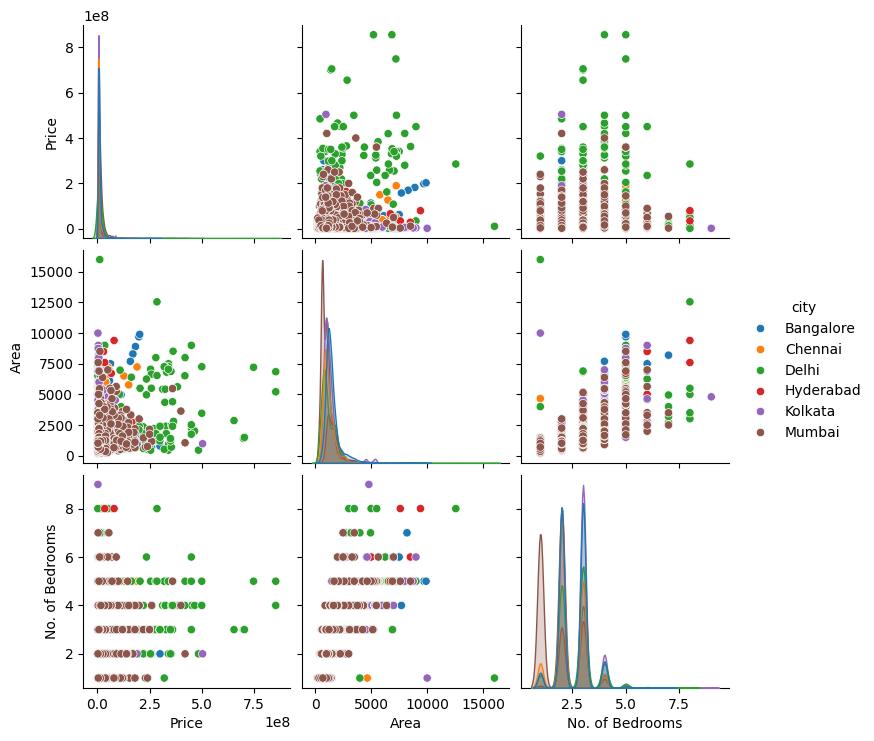

In [12]:
selected_columns = ['Price', 'Area', 'No. of Bedrooms', 'city']
sns.pairplot(data[selected_columns], hue='city')

**2. Build a Simple Linear Regression model to predict the Sale price of the house.**
* Use Area as the independent variable.

In [13]:
x = data[['Area']]
y = data['Price']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
simple_linear_model = LinearRegression()
simple_linear_model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = simple_linear_model.predict(x_test)

In [17]:
mse_simple = mean_squared_error(y_test, y_pred)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_simple)
print("Root Mean Squared Error:", rmse_simple)
print("R-squared:", r2_simple)

Mean Squared Error: 487436867711123.25
Root Mean Squared Error: 22077972.4547143
R-squared: 0.10823807413216724


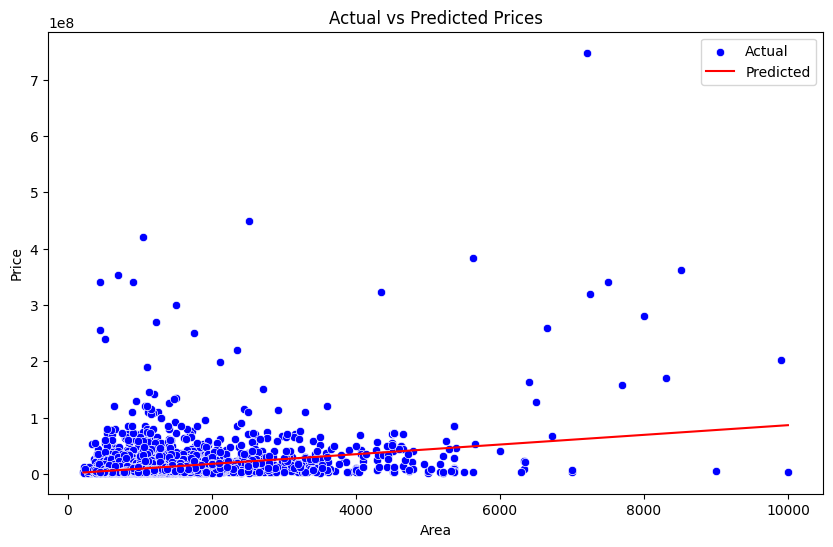

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_test['Area'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=x_test['Area'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [19]:
# print("Intercept (β₀):", simple_linear_model.intercept_)
# print("Slope (β₁):", simple_linear_model.coef_[0])

**3. Build Multiple Linear Regression model to predict Sale price of the house.**

In [20]:
lcoder = LabelEncoder()
data['location'] = lcoder.fit_transform(data['Location'])
data['city'] = lcoder.fit_transform(data['city'])
# Drop original 'Location' and 'city' columns
x = data.drop(['Price', 'Location'], axis=1)

y = data['Price']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
multi_linear_model = LinearRegression()
multi_linear_model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = multi_linear_model.predict(x_test)

In [24]:
mse_multiple = mean_squared_error(y_test, y_pred)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_multiple)
print("Root Mean Squared Error:", rmse_multiple)
print("R-squared:", r2_multiple)

Mean Squared Error: 479360774097214.7
Root Mean Squared Error: 21894309.171499673
R-squared: 0.12301322404736847


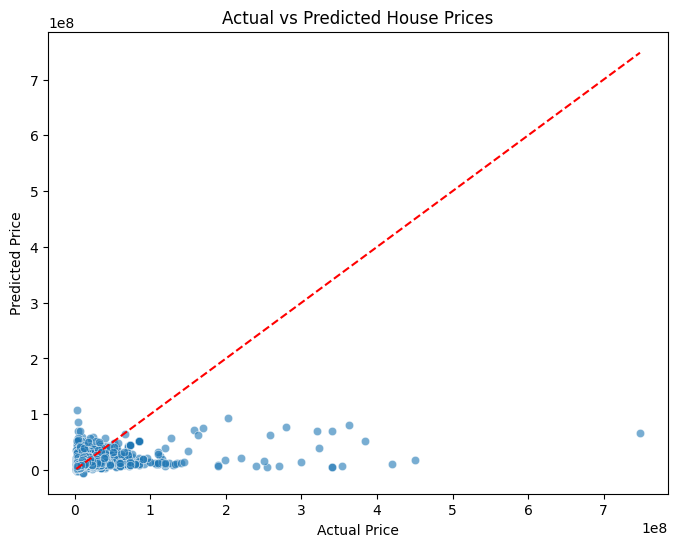

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

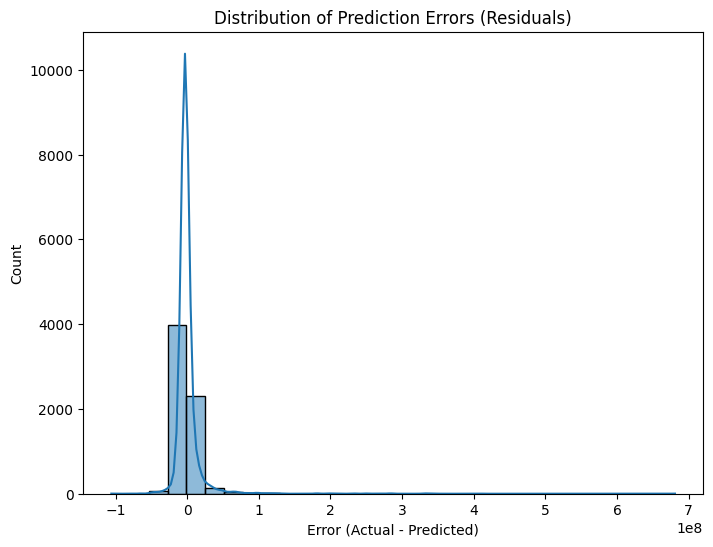

In [26]:
errors = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Count')
plt.show()

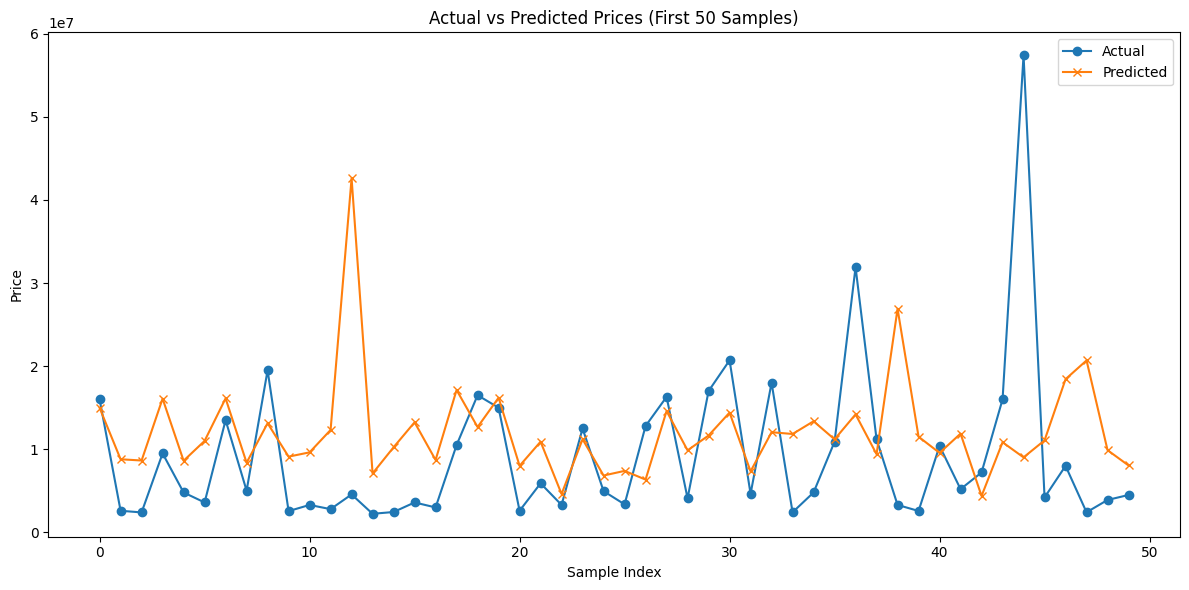

In [27]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.title("Actual vs Predicted Prices (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

**4. Use dimensionality reduction technique PCA/LDA and build Multiple Linear Regression model to predict Sale price of the house.**

In [28]:
x = data.drop(['Price', 'Location'], axis=1)
y = data['Price']

In [29]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled)

print("Original features:", x.shape[1])
print("Reduced features:", x_pca.shape[1])

Original features: 40
Reduced features: 3


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)
multi_linear_model1 = LinearRegression()
multi_linear_model1.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = multi_linear_model1.predict(x_test)

In [33]:
mse_pca = mean_squared_error(y_test, y_pred)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_pca)
print("Root Mean Squared Error:", rmse_pca)
print("R-squared:", r2_pca)

Mean Squared Error: 502244622424976.3
Root Mean Squared Error: 22410814.854105067
R-squared: 0.08114740303990597


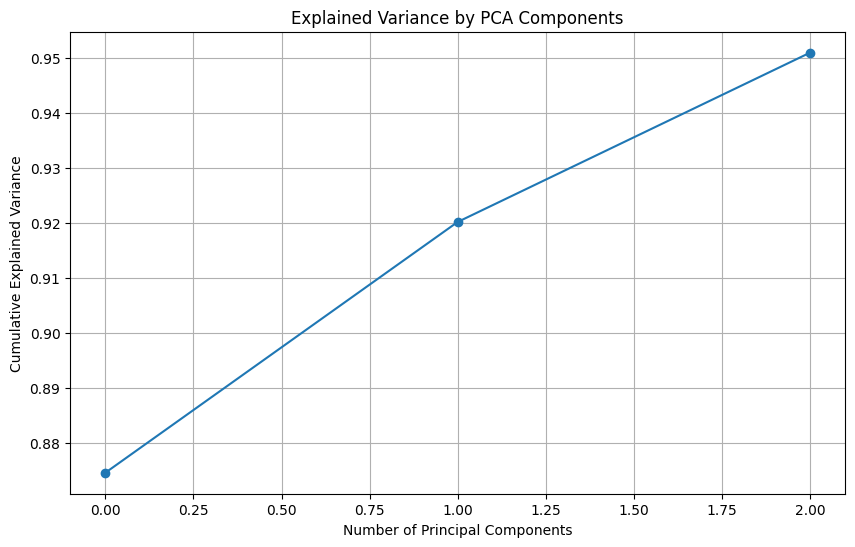

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

**5. Build a model using Lasso and Ridge regression to reduce model complexity.**

In [35]:
x = data.drop(['Price', 'Location'], axis=1)
y = data['Price']

In [36]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [69]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso - Mean Squared Error:", mse_lasso)
print("Lasso - Root Mean Squared Error:", rmse_lasso)
print("Lasso - R-squared:", r2_lasso)

Lasso - Mean Squared Error: 479249295502066.2
Lasso - Root Mean Squared Error: 21891763.188516043
Lasso - R-squared: 0.12321717326271919


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.287e+18, tolerance: 1.394e+15
  model = cd_fast.enet_coordinate_descent(


In [39]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge - Mean Squared Error:", mse_ridge)
print("Ridge - Root Mean Squared Error:", rmse_ridge)
print("Ridge - R-squared:", r2_ridge)

Ridge - Mean Squared Error: 479339992279831.75
Ridge - Root Mean Squared Error: 21893834.572313543
Ridge - R-squared: 0.12305124421925151


In [40]:
# Trying to check the difference of their Co-efficients
coef_data = pd.DataFrame({'Feature': x.columns, 'Lasso Coeff': lasso.coef_, 'Ridge Coeff': ridge.coef_})
coef_data

,Feature,Lasso Coeff,Ridge Coeff
0,Area,7.986966e+06,7.964316e+06
1,No. of Bedrooms,-1.602267e+06,-1.623732e+06
2,Resale,1.121329e+06,1.092840e+06
3,MaintenanceStaff,-2.549228e+06,-1.853389e+06
4,Gymnasium,2.644099e+05,4.505873e+05
5,SwimmingPool,6.289503e+06,8.937821e+06
6,LandscapedGardens,1.803009e+06,4.742681e+06
7,JoggingTrack,-8.234004e+06,-7.091202e+06
8,RainWaterHarvesting,4.109686e+06,4.470498e+06
9,IndoorGames,-2.640774e+06,-1.075460e+06


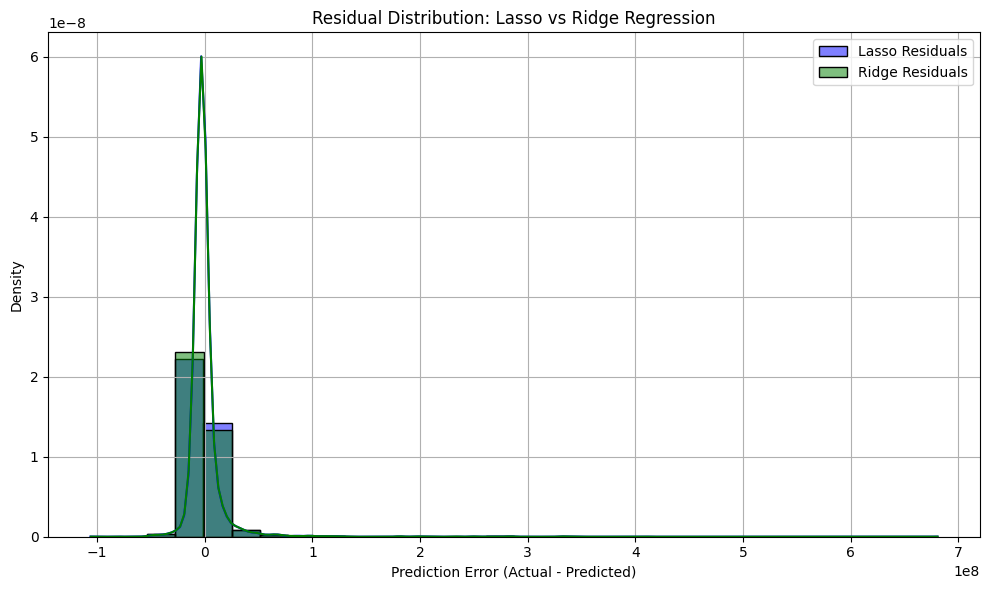

In [41]:
lasso_errors = y_test - y_pred_lasso
ridge_errors = y_test - y_pred_ridge

plt.figure(figsize=(10, 6))

# Plot Lasso residuals
sns.histplot(lasso_errors, bins=30, kde=True, color='blue', label='Lasso Residuals', stat='density', alpha=0.5)

# Plot Ridge residuals
sns.histplot(ridge_errors, bins=30, kde=True, color='green', label='Ridge Residuals', stat='density', alpha=0.5)

plt.title('Residual Distribution: Lasso vs Ridge Regression')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**6. Build an SVR model to predict Sale price of the house.**

In [46]:
x = data.drop(['Price', 'Location'], axis=1)
y = data['Price']

In [47]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaled = x_scaler.fit_transform(x)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [49]:
svr_model = SVR(kernel='rbf')  # Can alos use 'linear' or 'poly'
svr_model.fit(x_train, y_train)

SVR()

In [50]:
y_pred_scaled = svr_model.predict(x_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Getting it back to original scale
y_actual = y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).ravel()

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

mse_svr = mean_squared_error(y_actual, y_pred)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_actual, y_pred)

print("SVR MSE:", mse_svr)
print("SVR RMSE:", rmse_svr)
print("SVR R² Score:", r2_svr)

SVR MSE: 3.0500271504828792e+29
SVR RMSE: 552270508943115.56
SVR R² Score: -0.04812636234958023


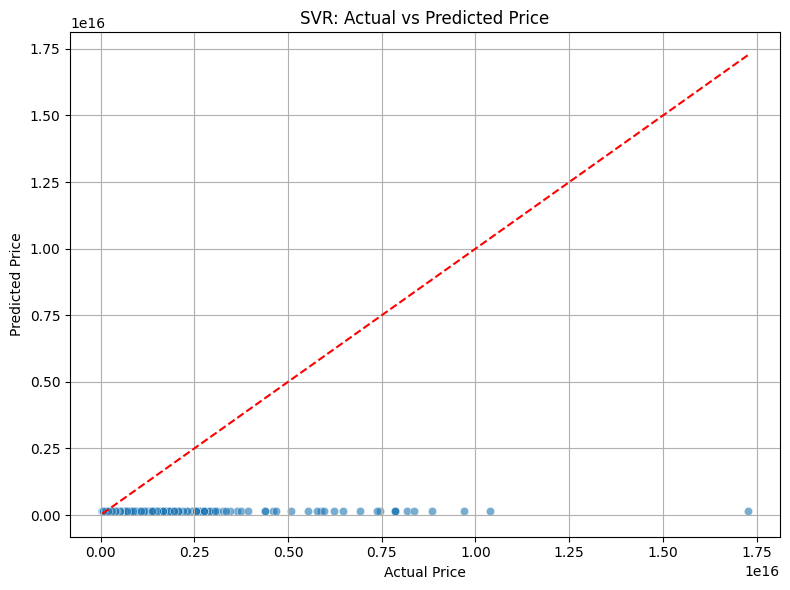

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVR: Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

**7. Build Decision Tree Regressor to predict Sale price of the house.**

In [53]:
x = data.drop(['Price', 'Location'], axis=1)
y = data['Price']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [55]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [57]:
y_pred = dt_model.predict(x_test)

mse_tree = mean_squared_error(y_test, y_pred)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred)

print("Decision Tree MSE:", mse_tree)
print("Decision Tree RMSE:", rmse_tree)
print("Decision Tree R² Score:", r2_tree)

Decision Tree MSE: 550668600862817.06
Decision Tree RMSE: 23466329.08792547
Decision Tree R² Score: -0.007443885659050631


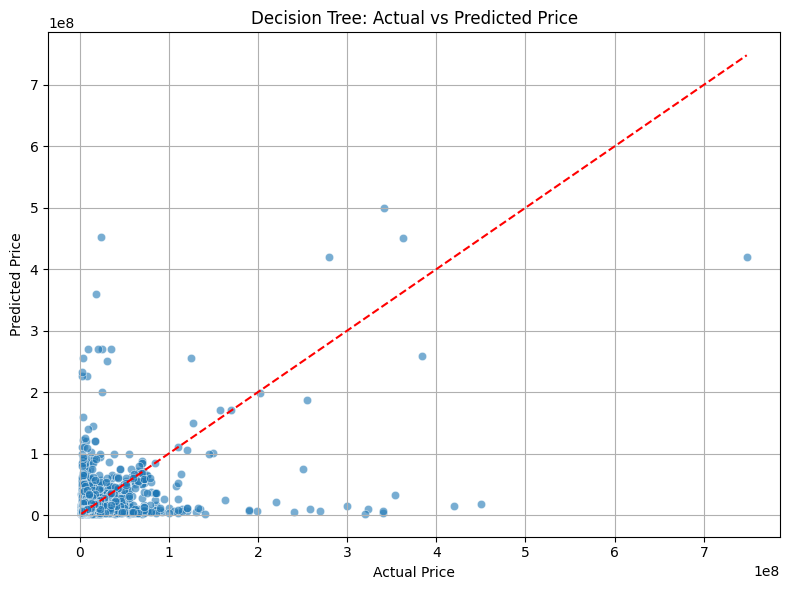

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

**8. Build Random Forest Regression model to predict Sale price of the house.**

In [59]:
x = data.drop(['Price', 'Location'], axis=1)
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [60]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
y_pred = rf_model.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred)

print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R² Score:", r2_rf)

Random Forest MSE: 440232903764951.94
Random Forest RMSE: 20981727.85461083
Random Forest R² Score: 0.194597355888796


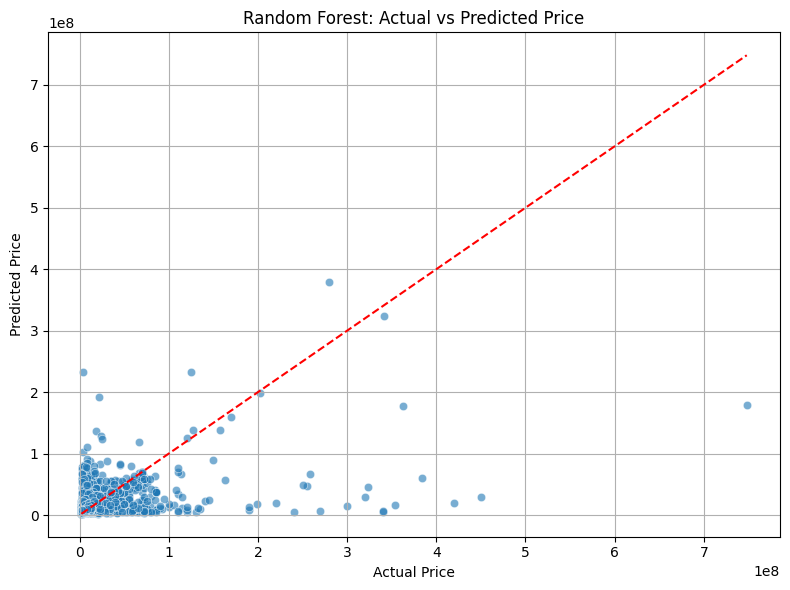

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

**9. Use GridsearchCV and RandomizedsearchCV for tuning hyperparameters and fit your model on the optimal parameters.**

In [63]:
x = data.drop(['Price', 'Location'], axis=1)
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [64]:
# Randomized Search parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [65]:
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,           # Try 20 random combos
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train, y_train)
print("Best parameters from RandomizedSearchCV:\n", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
55 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters from RandomizedSearchCV:
 {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}


In [66]:
grid_param = {
    'n_estimators': [random_search.best_params_['n_estimators'] - 100,
                     random_search.best_params_['n_estimators'],
                     random_search.best_params_['n_estimators'] + 100],
    'max_depth': [random_search.best_params_['max_depth'], None],
    'min_samples_split': [random_search.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=grid_param,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)
print("Best parameters from GridSearchCV:\n", grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best parameters from GridSearchCV:
 {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [67]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

mse_rft = mean_squared_error(y_test, y_pred)
rmse_rft = np.sqrt(mse_rft)
r2_rft = r2_score(y_test, y_pred)

print("Tuned Random Forest MSE:", mse_rft)
print("Tuned Random Forest RMSE:", rmse_rft)
print("Tuned Random Forest R²:", r2_rft)

Tuned Random Forest MSE: 411471867727951.94
Tuned Random Forest RMSE: 20284769.353580333
Tuned Random Forest R²: 0.24721544570778242


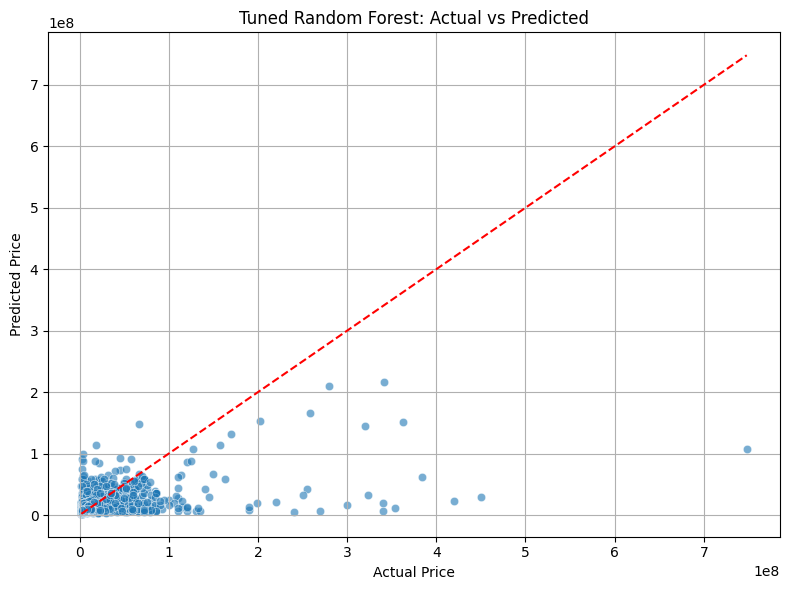

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Tuned Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

**10. Model Selection: Evaluate and compare performance of all the models to find the best model.**

In [70]:
results = pd.DataFrame({
    'Model': [
        'Simple Linear Regression',
        'Multiple Linear Regression',
        'PCA + Linear Regression',
        'Lasso Regression',
        'Ridge Regression',
        'SVR',
        'Decision Tree',
        'Random Forest',
        'Tuned Random Forest'
    ],
    'RMSE': [
        rmse_simple,
        rmse_multiple,
        rmse_pca,
        rmse_lasso,
        rmse_ridge,
        rmse_svr,
        rmse_tree,
        rmse_rf,
        rmse_rft
    ],
    'R2 Score': [
        r2_simple,
        r2_multiple,
        r2_pca,
        r2_lasso,
        r2_ridge,
        r2_svr,
        r2_tree,
        r2_rf,
        r2_rft
    ]
})

results.sort_values(by='RMSE', ascending=True, inplace=True)
print(results)

                        Model          RMSE  R2 Score
8         Tuned Random Forest  2.028477e+07  0.247215
7               Random Forest  2.098173e+07  0.194597
3            Lasso Regression  2.189176e+07  0.123217
4            Ridge Regression  2.189383e+07  0.123051
1  Multiple Linear Regression  2.189431e+07  0.123013
0    Simple Linear Regression  2.207797e+07  0.108238
2     PCA + Linear Regression  2.241081e+07  0.081147
6               Decision Tree  2.346633e+07 -0.007444
5                         SVR  5.522705e+14 -0.048126


/tmp/ipython-input-71-2055338030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results, palette='viridis')


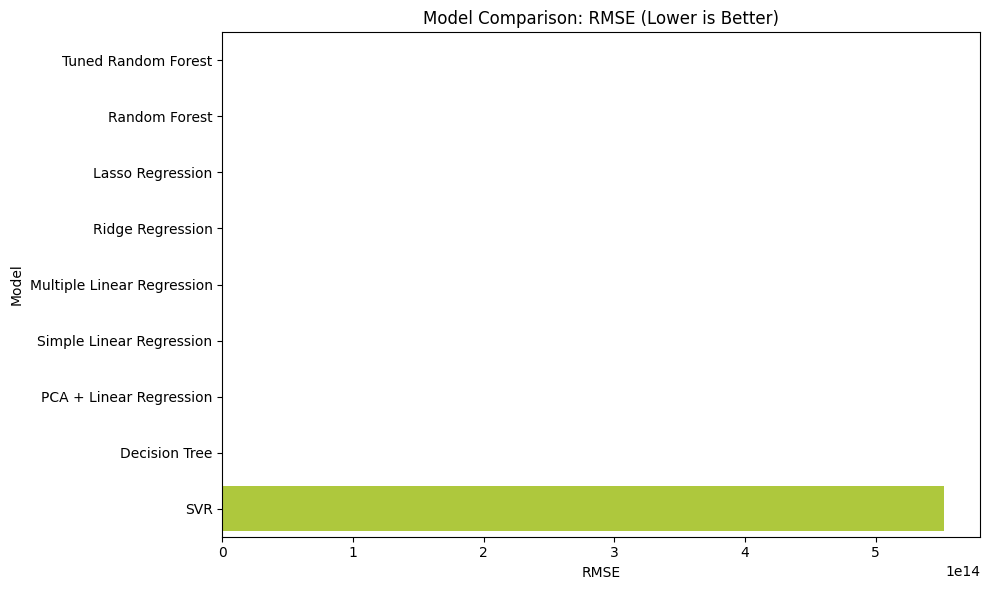

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results, palette='viridis')
plt.title("Model Comparison: RMSE (Lower is Better)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-72-4266329371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results, palette='magma')


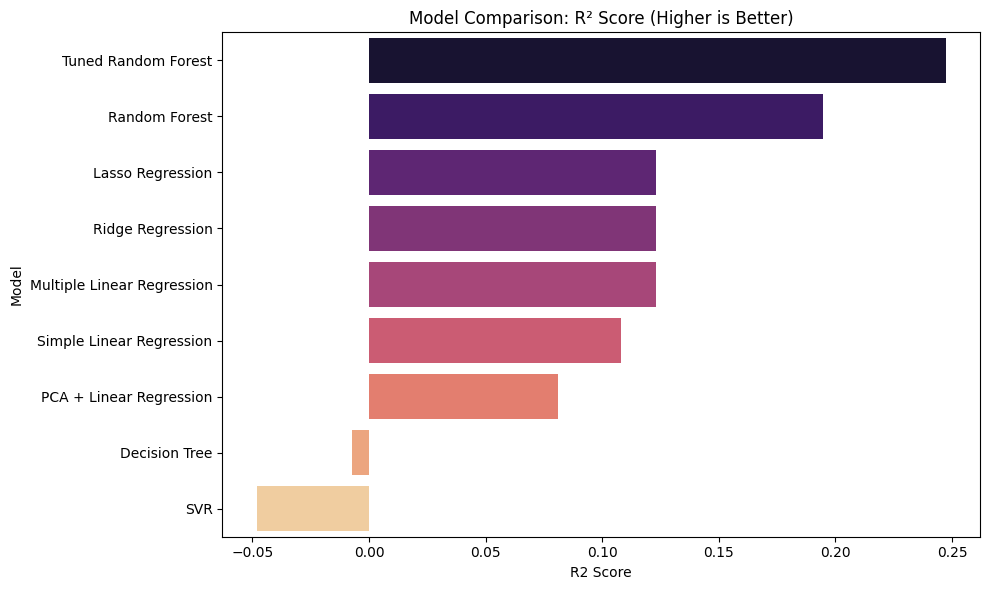

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=results, palette='magma')
plt.title("Model Comparison: R² Score (Higher is Better)")
plt.tight_layout()
plt.show()